<a href="https://colab.research.google.com/github/petergchang/proximal_jax/blob/main/proximal_jax_notepad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
from itertools import product

import matplotlib.pyplot as plt
import jax.numpy as jnp
import jax.random as jr
from jax import vmap
from jax.numpy.linalg import norm
from jax.scipy.optimize import minimize

# 1. Introduction

First, we define the *proximal operator*.

In [62]:
# argmin of a function
def fn_argmin(fn, initial_guess=0.0, fp_digits=2):
    opt_result = minimize(fn, jnp.atleast_1d(initial_guess), method='BFGS')
    return round(opt_result.x, fp_digits)

In [63]:
# Define general proximal operator
def proximal_operator(fn, v, lamb=1):
    new_fn = lambda x: fn(x) + 1/(2*lamb) * norm(x-v)
    return fn_argmin(new_fn)

As a simple example, we consider the convex function $f(x) = x^2$ with domain $\mathbb{R}$.

In [64]:
def convex_fn_1d(x):
    """ Simple convex function R->R
    """
    return jnp.reshape(x**2, ())

# Vectorized version
vec_convex_fn_1d = vmap(convex_fn_1d)

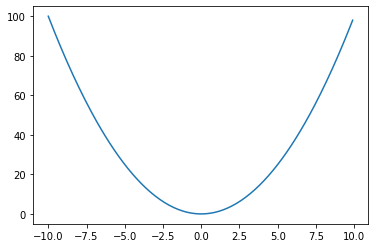

In [65]:
input_grid = jnp.arange(-10, 10, 0.1)
plt.plot(input_grid, vec_convex_fn_1d(input_grid));

We observe how the proximal operator moves uniformly-sampled points towards the minimum of the function (i.e. $x=0$).

In [105]:
random_points = jr.uniform(jr.PRNGKey(0), shape=(10,), minval=-10, maxval=10)

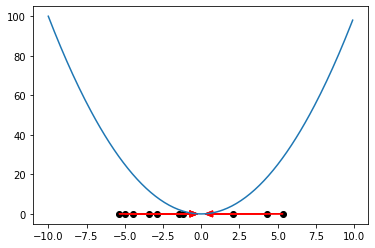

In [104]:
fig, ax = plt.subplots()
ax.plot(input_grid, vec_convex_fn_1d(input_grid))
for point in random_points:
    post_proximal_point = proximal_operator(convex_fn_1d, point)[0]
    # Plot input
    ax.scatter(point, 0, c='black')
    # Indicate proximal operator
    ax.arrow(point, 0, post_proximal_point-point, 0, head_length=0.5,
             head_width=3, length_includes_head=True, color='red');

Note that the proximal operator moves every negative number to $-0.25$ and every positive number to $0.25$.

To see why, consider the following:
\begin{align}
\textbf{prox}_{\lambda f}(v) &= \text{argmin}_{x}\left( x^2 + \frac{|x-v|}{2\lambda} \right) \\
&= \text{root}_{x} \left( 2x \pm \frac{1}{2\lambda} \right) \\
&= \begin{cases}
    \frac{1}{4\lambda} & \text{if } x \geq 0 \\
    -\frac{1}{4\lambda} & \text{if } x < 0
\end{cases}
\end{align}
which, for $\lambda = 1$, becomes $\pm 0.25$.

In [69]:
random_points = jr.uniform(jr.PRNGKey(0), shape=(10,), minval=-10, maxval=10)
print(random_points)

[-2.9018974  2.083981  -1.4483142 -5.3876805 -3.4028292 -1.2092686
 -4.9800467 -4.4538856  5.3564143  4.294913 ]


In [70]:
post_proximal_points = vmap(proximal_operator, (None, 0))(convex_fn_1d, random_points)
print(post_proximal_points)

[[-0.25]
 [ 0.25]
 [-0.25]
 [-0.25]
 [-0.25]
 [-0.25]
 [-0.25]
 [-0.25]
 [ 0.25]
 [ 0.25]]


In [ ]:
# Example of convex function
def convex_fn_2d(x):
    """ Simple convex function R2->R
    """
    assert x.shape == (2,)
    return jnp.log(1 - x[0]**2 + x[1])

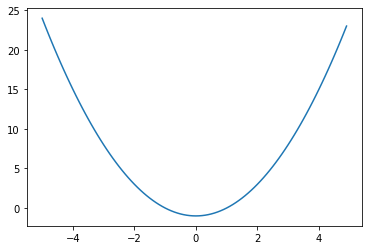

In [ ]:
x = jnp.arange(-5, 5, 0.1)
y = jnp.arange(-5, 5, 0.1)
domain = lambda x: x**2 - 1

# Plot the domain boundary
plt.plot(x, domain(x));

In [ ]:
XX, YY = jnp.meshgrid(x, y)
print(jnp.array([x, y]).shape)
output = vmap(convex_fn1)(jnp.array([x, y]))

(2, 100)


AssertionError: ignored

In [ ]:
output

DeviceArray([800, 724, 656, 596, 544, 500, 464, 436, 416, 404, 400, 404,
             416, 436, 464, 500, 544, 596, 656, 724, 724, 648, 580, 520,
             468, 424, 388, 360, 340, 328, 324, 328, 340, 360, 388, 424,
             468, 520, 580, 648, 656, 580, 512, 452, 400, 356, 320, 292,
             272, 260, 256, 260, 272, 292, 320, 356, 400, 452, 512, 580,
             596, 520, 452, 392, 340, 296, 260, 232, 212, 200, 196, 200,
             212, 232, 260, 296, 340, 392, 452, 520, 544, 468, 400, 340,
             288, 244, 208, 180, 160, 148, 144, 148, 160, 180, 208, 244,
             288, 340, 400, 468, 500, 424, 356, 296, 244, 200, 164, 136,
             116, 104, 100, 104, 116, 136, 164, 200, 244, 296, 356, 424,
             464, 388, 320, 260, 208, 164, 128, 100,  80,  68,  64,  68,
              80, 100, 128, 164, 208, 260, 320, 388, 436, 360, 292, 232,
             180, 136, 100,  72,  52,  40,  36,  40,  52,  72, 100, 136,
             180, 232, 292, 360, 416, 340, 272, 212

In [ ]:
# argmin of a function
def fn_argmin(fn, initial_guess=0.0, fp_digits=2):
    argmin = round(fmin(fn, initial_guess, disp=False)[0], fp_digits)
    return argmin

In [ ]:
# Define general proximal operator
def proximal_operator(fn, v, lamb=1):
    new_fn = lambda x: fn(x) + 1/(2*lamb) * norm(x-v)
    return fn_argmin(new_fn)

In [ ]:
proximal_operator(convex_fn1, 1)

0.25

In [ ]:
x = jnp.array([1,2,3])
x.shape == (3,)

True